In [119]:
# Import required modules
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')

In [120]:
#from google.colab import files
#uploaded = files.upload()
url = 'https://github.com/shankhiremath/Temporary-files/blob/main/dataset.xlsx?raw=true'

In [121]:
# Read the data using pandas
# image converted to xlsx file using https://www.extracttable.com/
#df = pd.read_excel('dataset.xlsx')
df = pd.read_excel(url)
df = df[df.columns[:2]]
df

,Ages (days),Weights (mg)
0,15,21.66
1,15,22.75
2,15,22.30
3,18,31.25
4,28,44.79
...,...,...
66,705,242.40
67,723,230.77
68,756,242.57
69,768,232.12


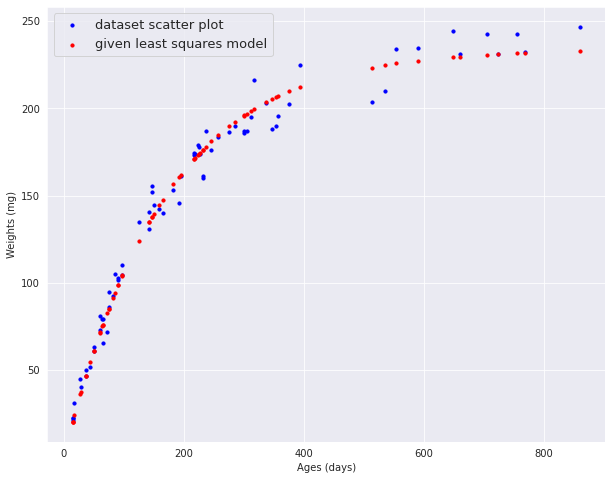

In [122]:
# Visualise the data using scatter plot and visualise the performance of the
# given least squares model
X, y = df['Ages (days)'], df['Weights (mg)']
LSfit = 233.846 * (1 - np.exp(-0.006042 * X))
plt.figure(figsize = (10,8))
plt.scatter(X, y, color = 'b', s = 10)
plt.scatter(X, LSfit, color = 'r', s = 10)
plt.legend(['dataset scatter plot', 'given least squares model'], fontsize = 13)
plt.xlabel('Ages (days)')
plt.ylabel('Weights (mg)')
plt.show()

In [123]:
# Import sklearn for MLP regressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

def reshape(arr):
    temp1 = arr.values
    arr = temp1.reshape(-1,1)
    return arr

scaler = StandardScaler()
Xbar = scaler.fit_transform(reshape(X))
X_train, X_test, y_train, y_test = train_test_split(Xbar, y, random_state = 30, test_size = 0.1)
print('MSE between the given weights data and the given least square model is:', mean_squared_error(y, LSfit), '\n')

# Checking performance of networks using different activation functions
activation_list = ['identity', 'logistic', 'tanh', 'relu']
for activation in activation_list:
    mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (40), learning_rate_init = 0.01, alpha = 0.00001, max_iter = 15000, shuffle = True, random_state = 30,
                       activation = activation)
    simplefilter("ignore", category=ConvergenceWarning)
    mlp.fit(X_train, y_train)
    print(activation, 'Training MSE:',mean_squared_error(y_train, mlp.predict(X_train)), 'Test MSE:', mean_squared_error(y_test, mlp.predict(X_test)))
print('\n')

MSE between the given weights data and the given least square model is: 76.11624235046557 

identity Training MSE: 1016.6460266330021 Test MSE: 960.1000949260355
logistic Training MSE: 12.28685133539424 Test MSE: 213.94944582326835
tanh Training MSE: 31.05363767091464 Test MSE: 34.925419162391265
relu Training MSE: 52.26904872573442 Test MSE: 81.7823913050124




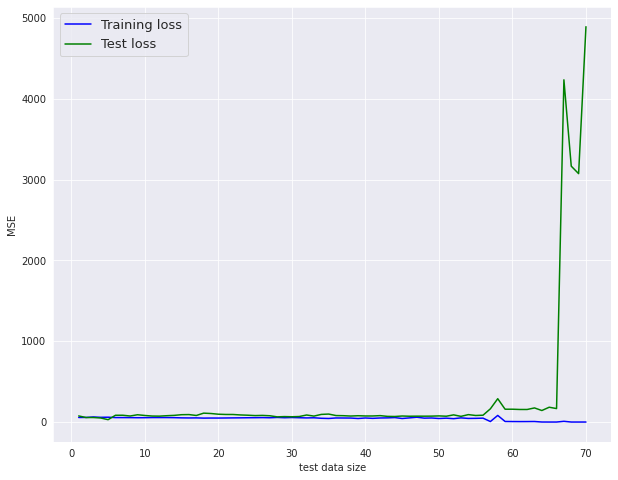

In [124]:
# Checking loss vs iteration

def learningcurve():
    trainlosshist = []
    testlosshist = []
    iter = []
    for i in range(1, 71):
        iter.append(i)
        mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (20), alpha = 0.0001, max_iter = 500, shuffle = False, random_state = 30,
                           activation = 'relu')
        simplefilter("ignore", category=ConvergenceWarning)
        X_train, X_test, y_train, y_test = train_test_split(Xbar, y, random_state = 30, test_size = i / 71)
        mlp.fit(X_train, y_train)
        pred_train = mlp.predict(X_train)
        pred_test = mlp.predict(X_test)
        trainlosshist.append(mean_squared_error(y_train, pred_train))
        testlosshist.append(mean_squared_error(y_test, pred_test))    

        # Visualise the data using scatter plot and compare with network's prediction
    plt.figure(figsize = (10,8))
    plt.plot(iter, trainlosshist, color = 'b')
    plt.plot(iter, testlosshist, color = 'g')
    plt.legend(['Training loss', 'Test loss'], fontsize = 13)
    plt.xlabel('test data size')
    plt.ylabel('MSE')
    plt.show()

learningcurve()

MSE on whole dataset 1010.2685320210118


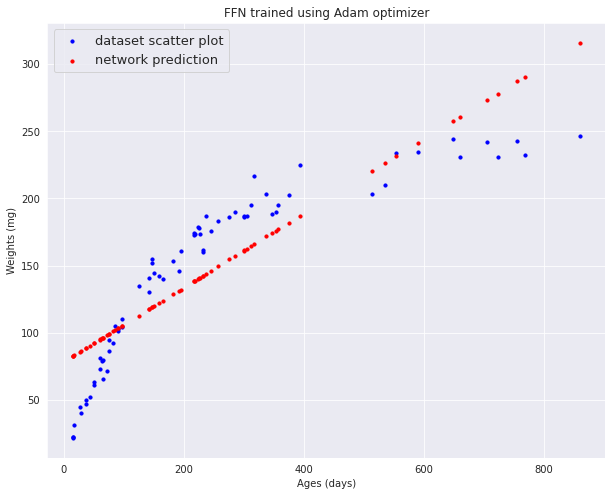

In [125]:
# model with adam solver
X_train, X_test, y_train, y_test = train_test_split(Xbar, y, random_state = 30, test_size = 0.1)
mlp = MLPRegressor(solver = 'adam', hidden_layer_sizes = (20), learning_rate_init = 0.01, alpha = 0.00001, max_iter = 15000, shuffle = True, random_state = 30,
                       activation = 'relu')
mlp.fit(X_train, y_train)
pred_y = mlp.predict(Xbar)
print('MSE on whole dataset', mean_squared_error(y, pred_y))
# Visualise the data using scatter plot and compare with network's prediction
plt.figure(figsize = (10,8))
plt.scatter(X, y, color = 'b', s = 10)
plt.scatter(X, pred_y, color = 'r', s = 10)
plt.legend(['dataset scatter plot', 'network prediction'], fontsize = 13)
plt.xlabel('Ages (days)')
plt.ylabel('Weights (mg)')
plt.title('FFN trained using Adam optimizer')
plt.show()

In [126]:
# Function learning_rate_performance for checking performance of network with different number of neurons in the hidden layer
# Function regularisation_performance for checking performance of network with different values of regularisation

def hidden_unit_performance():
    train_scores, test_scores, i_s = [], [], []
    for i in range(1, 51):
        i_s.append(i)
        mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (i), max_iter = 500, shuffle = True, random_state = 30,
                           activation = 'relu')
        mlp.fit(X_train, y_train)
        train_scores.append(mean_squared_error(y_train, mlp.predict(X_train)))
        test_scores.append(mean_squared_error(y_test, mlp.predict(X_test)))
    plt.figure(figsize=(10,8))
    plt.plot(i_s, train_scores, color = 'b')
    plt.plot(i_s, test_scores, color = 'g')
    plt.xlabel('Hidden units')
    plt.ylabel('MSE')
    plt.legend(['MSE on Training data', 'MSE on Test data'], fontsize = 14)
    plt.title('Training and test data MSE with hidden units')
    plt.show()

def regularisation_performance():
    train_scores, test_scores, i_s = [], [], []
    alphas = [i / 1000000 for i in range(1, 5000, 50)]
    for i in alphas:
        i_s.append(i)
        mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (20), learning_rate_init = 0.01, alpha = i, max_iter = 500, random_state = 30,
                           activation = 'relu')
        mlp.fit(X_train, y_train)
        train_scores.append(mean_squared_error(y_train, mlp.predict(X_train)) ** 0.5)
        test_scores.append(mean_squared_error(y_test, mlp.predict(X_test)) ** 0.5)
    plt.figure(figsize = (10,8))
    plt.scatter(alphas, train_scores, color = 'b', s = 10)
    plt.scatter(alphas, test_scores, color = 'g', s = 10)
    plt.xlabel('Regularisation value')
    plt.ylabel('MSE')
    plt.legend(['MSE on Training data', 'MSE on Test data'], fontsize = 14)
    plt.title('Training and test data RMSE against alpha value')
    plt.show()

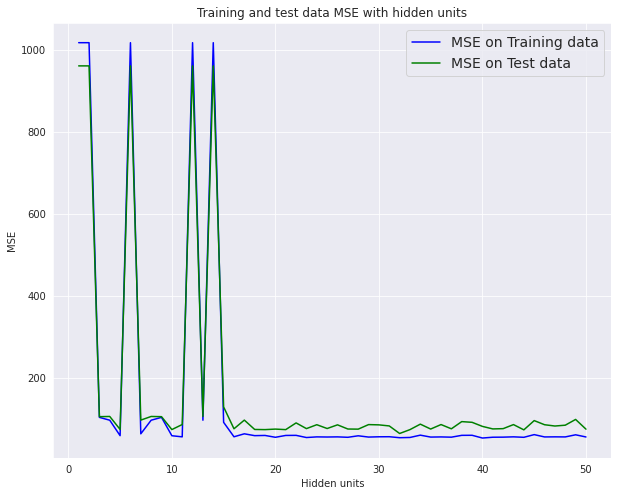

In [127]:
hidden_unit_performance()

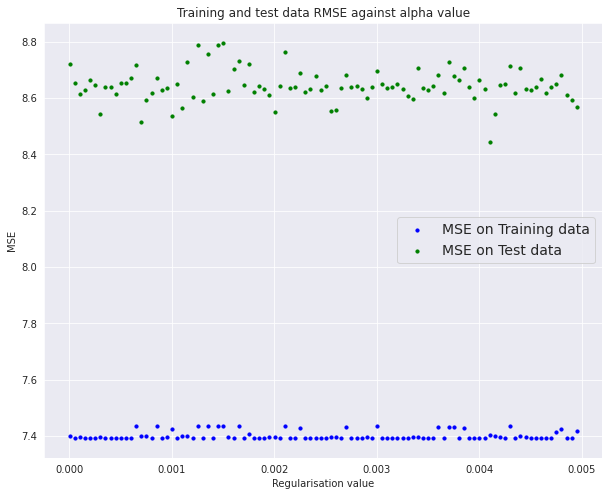

In [128]:
regularisation_performance()

Text(0, 0.5, 'MSE')

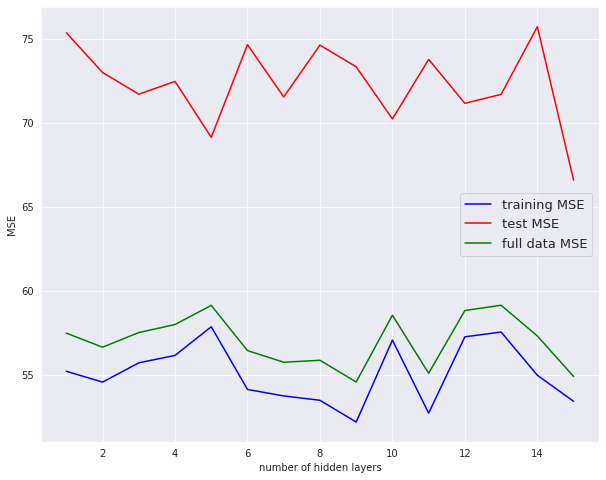

In [129]:
# model with lbfgs solver and different number of hidden layers
trainlist, testlist, fulldata, ilist = [], [], [], []
for i in range(1, 16):
    mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (20,)*i, alpha = 0.0041, max_iter = 500, shuffle = True, random_state = 30,
                       activation = 'relu')
    mlp.fit(X_train, y_train)
    pred_y = mlp.predict(Xbar)
    trainlist.append(mean_squared_error(y_train, mlp.predict(X_train)))
    testlist.append(mean_squared_error(y_test, mlp.predict(X_test)))
    fulldata.append(mean_squared_error(y, pred_y))
    ilist.append(i)
plt.figure(figsize=(10,8))
plt.plot(ilist, trainlist, color = 'b')
plt.plot(ilist, testlist, color = 'r')
plt.plot(ilist, fulldata, color = 'g')
plt.legend(['training MSE', 'test MSE', 'full data MSE'], fontsize = 13)
plt.xlabel('number of hidden layers')
plt.ylabel('MSE')


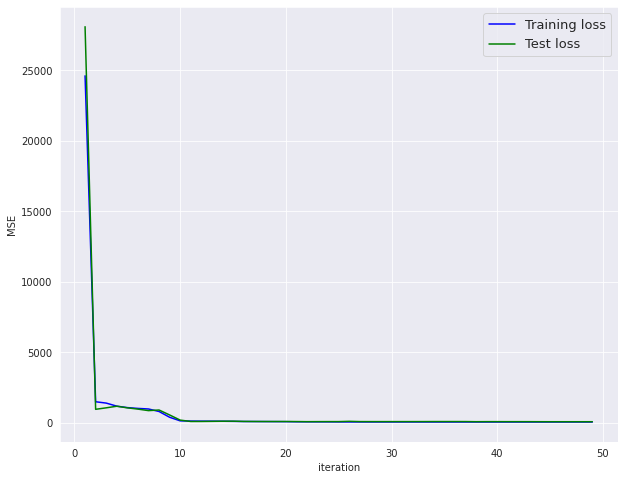

In [130]:
# Checking loss vs iteration

def losscurves():
    trainlosshist = []
    testlosshist = []
    iter = []
    for i in range(1, 50):
        iter.append(i)
        mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (20, 20), alpha = 0.0041, max_iter = i, shuffle = False, random_state = 30,
                           activation = 'relu')
        simplefilter("ignore", category=ConvergenceWarning)
        mlp.fit(X_train, y_train)
        pred_train = mlp.predict(X_train)
        pred_test = mlp.predict(X_test)
        trainlosshist.append(mean_squared_error(y_train, pred_train))
        testlosshist.append(mean_squared_error(y_test, pred_test))    

        # Visualise the data using scatter plot and compare with network's prediction
    plt.figure(figsize = (10,8))
    plt.plot(iter, trainlosshist, color = 'b')
    plt.plot(iter, testlosshist, color = 'g')
    plt.legend(['Training loss', 'Test loss'], fontsize = 13)
    plt.xlabel('iteration')
    plt.ylabel('MSE')
    plt.show()

losscurves()

MSE on whole dataset 57.32799139134174


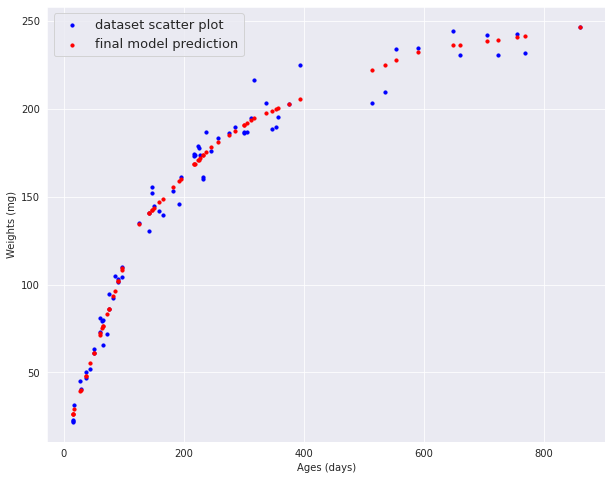

In [131]:
# Final model
mlp = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = (20, 20), alpha = 0.0041, max_iter = 50, shuffle = True, random_state = 30,
                       activation = 'relu')
mlp.fit(X_train, y_train)
pred_y = mlp.predict(Xbar)
print('MSE on whole dataset', mean_squared_error(y, pred_y))
# Visualise the data using scatter plot and compare with network's prediction
plt.figure(figsize = (10,8))
plt.scatter(X, y, color = 'b', s = 10)
plt.scatter(X, pred_y, color = 'r', s = 10)
plt.legend(['dataset scatter plot', 'final model prediction'], fontsize = 13)
plt.xlabel('Ages (days)')
plt.ylabel('Weights (mg)')
plt.show()